In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
import os
cwd = os.getcwd()
project_path = (cwd, None)
while project_path[1] != "Code":
    project_path = os.path.split(project_path[0])
project_path = project_path[0]

data_in = pd.read_csv(project_path + "/Datasets/data_in.csv")

In [10]:
data = data_in[filter(lambda x: ".origin" in x or x in ("FARE", "Distance", "Time.min", "Stops"), data_in.columns)]
correlations = data.corr()

# Below code from https://www.kaggle.com/code/sgalella/correlation-heatmaps-with-hierarchical-clustering/notebook

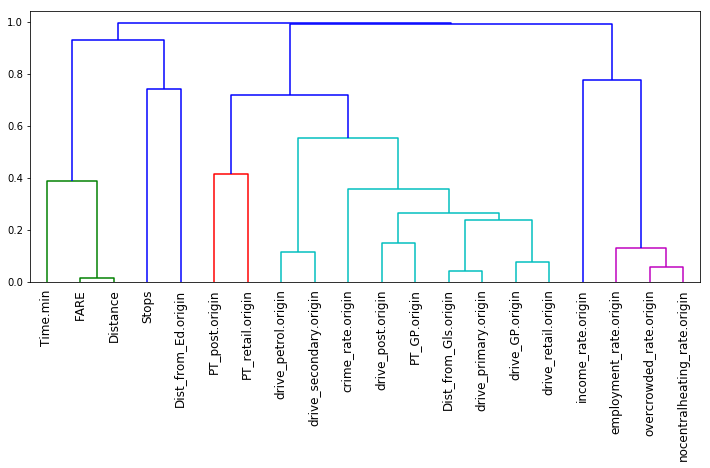

In [13]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform

plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(correlations)
Z = linkage(squareform(dissimilarity), 'complete')

dendrogram(Z, labels=data.columns, orientation='top', 
           leaf_rotation=90);

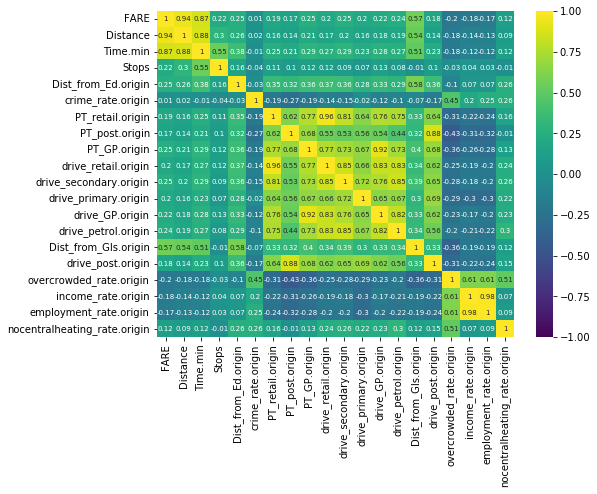

In [24]:
# Clusterize the data
threshold = 0.8
labels = fcluster(Z, threshold, criterion='distance')

# Show the cluster
labels

# Keep the indices to sort labels
labels_order = np.argsort(labels)

# Build a new dataframe with the sorted columns
for idx, i in enumerate(data.columns[labels_order]):
    if idx == 0:
        clustered = pd.DataFrame(data[i])
    else:
        df_to_append = pd.DataFrame(data[i])
        clustered = pd.concat([clustered, df_to_append], axis=1)
        
        
plt.figure(figsize=(8,6))
correlations = clustered.corr()
sns.heatmap(round(correlations,2), cmap='viridis', annot=True, 
            annot_kws={"size": 7}, vmin=-1, vmax=1);


plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\Visualisation\Correlation Heatmap.png", dpi = 300, bbox_inches = "tight")

In [22]:
plt.savefig(r"C:\Users\User\Documents\4. Fourth Year\Project\Write Up Artifacts\Visualisation\Correlation Heatmap.png", dpi = 300)

<Figure size 432x288 with 0 Axes>